Can one define different classes of peaks based on the signal and its variation across cells?**
                                                    NK.27+11b-.BM  \
(ImmGenATAC1219.peak_1, chr1, 3020786, 0.0, 0.5...           0.82   
(ImmGenATAC1219.peak_2, chr1, 3087226, 0.0, 0.5...           1.46   
(ImmGenATAC1219.peak_3, chr1, 3120109, 0.07, 10...           0.20   
(ImmGenATAC1219.peak_4, chr1, 3121485, 0.15, 3....           1.72   
(ImmGenATAC1219.peak_5, chr1, 3372787, 0.03, 1....           0.20   
(ImmGenATAC1219.peak_6, chr1, 3399217, 0.06, 2....           1.46   
(ImmGenATAC1219.peak_7, chr1, 3400115, 0.44, 2....           0.82   
(ImmGenATAC1219.peak_8, chr1, 3416260, 0.01, 2....           1.10   
(ImmGenATAC1219.peak_9, chr1, 3434092, 0.18, 1....           2.68   
(ImmGenATAC1219.peak_10, chr1, 3434378, 0.15, 1...           1.72   

                                                    NK.27+11b+.BM  \
(ImmGenATAC1219.peak_1, chr1, 3020786, 0.0, 0.5...           0.22   
(ImmGe

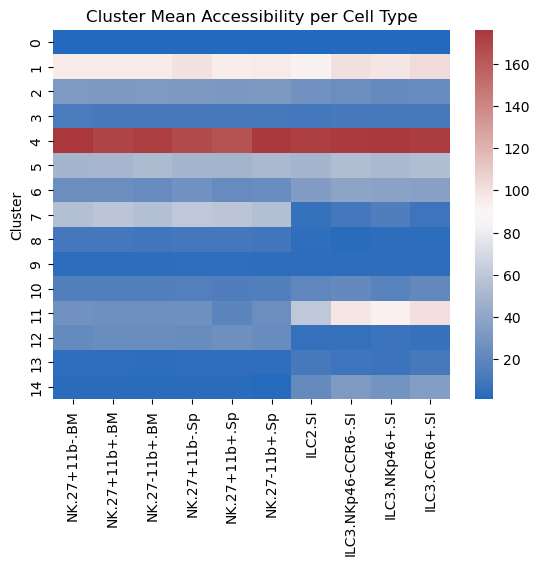

('ImmGenATAC1219.peak_377', 'chr1', 7088775, 0.14, 125.32, 1.0, nan, 'Pcmtd1', 149.18, 217.94, 149.41, 192.08, 182.98, 188.08, 154.81, 126.35, 103.35, 147.79, 144.6, 150.62, 154.02, 170.36, 184.63, 167.45, 146.42, 148.68, 155.93, 145.38, 182.24, 162.51, 150.09, 201.61, 184.09, 195.03, 161.99, 152.57, 159.55, 147.27, 167.18, 182.58, 175.19, 185.37, 179.76, 221.89, 188.87, 172.12, 169.86, 134.12, 149.28, 152.27, 184.49, 173.86, 190.55, 180.52, 223.48, 185.39, 144.44, 167.97, 151.83, 163.73, 148.37, 170.42, 190.58, 185.11, 183.7, 191.22, 178.73, 170.73, 199.18, 187.49, 176.32, 175.19, 179.86, 192.75, 127.94, 136.67, 134.68, 195.28, 174.79, 195.71, 199.03, 170.89, 188.83, 212.36, 193.24, 168.34, 171.49, 151.27, 156.62, 166.94, 153.41, 135.38, 158.39, 177.82, 190.81, 190.89, 194.55, 186.88)
('ImmGenATAC1219.peak_436', 'chr1', 7398142, 0.0, 109.71, 1.0, nan, nan, 125.15, 135.11, 117.26, 141.18, 141.15, 151.75, 116.44, 91.94, 109.47, 115.99, 112.63, 132.29, 118.79, 138.19, 153.9, 138.12, 114.

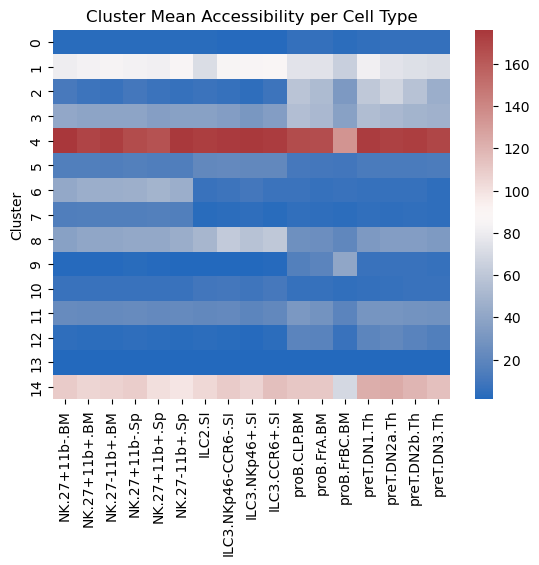

('ImmGenATAC1219.peak_377', 'chr1', 7088775, 0.14, 125.32, 1.0, nan, 'Pcmtd1', 149.18, 217.94, 149.41, 192.08, 182.98, 188.08, 154.81, 126.35, 103.35, 147.79, 144.6, 150.62, 154.02, 170.36, 184.63, 167.45, 146.42, 148.68, 155.93, 145.38, 182.24, 162.51, 150.09, 201.61, 184.09, 195.03, 161.99, 152.57, 159.55, 147.27, 167.18, 182.58, 175.19, 185.37, 179.76, 221.89, 188.87, 172.12, 169.86, 134.12, 149.28, 152.27, 184.49, 173.86, 190.55, 180.52, 223.48, 185.39, 144.44, 167.97, 151.83, 163.73, 148.37, 170.42, 190.58, 185.11, 183.7, 191.22, 178.73, 170.73, 199.18, 187.49, 176.32, 175.19, 179.86, 192.75, 127.94, 136.67, 134.68, 195.28, 174.79, 195.71, 199.03, 170.89, 188.83, 212.36, 193.24, 168.34, 171.49, 151.27, 156.62, 166.94, 153.41, 135.38, 158.39, 177.82, 190.81, 190.89, 194.55, 186.88)
('ImmGenATAC1219.peak_436', 'chr1', 7398142, 0.0, 109.71, 1.0, nan, nan, 125.15, 135.11, 117.26, 141.18, 141.15, 151.75, 116.44, 91.94, 109.47, 115.99, 112.63, 132.29, 118.79, 138.19, 153.9, 138.12, 114.

In [11]:
print("Can one define different classes of peaks based on the signal and its variation across cells?**")

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import seaborn as sns
import matplotlib.pyplot as plt


# Load the data
df_raw = pd.read_csv("data/ImmGenATAC18_AllOCRsInfo.csv", header=0, quotechar='"', low_memory=False)

# Extract only the columns for NK and ILC. Only 5000 samples
df_expr = df_raw[['NK.27+11b-.BM', 'NK.27+11b+.BM', 'NK.27-11b+.BM', 'NK.27+11b-.Sp',
       'NK.27+11b+.Sp', 'NK.27-11b+.Sp', 'ILC2.SI', 'ILC3.NKp46-CCR6-.SI',
       'ILC3.NKp46+.SI', 'ILC3.CCR6+.SI']]
df_expr = df_expr.iloc[:5000, :]
df_expr.index = df_raw.iloc[:5000, :] 
print(df_expr[:10])


from sklearn.cluster import KMeans

k = 15 
kmeans = KMeans(n_clusters=k, random_state=42)
df_expr['Cluster'] = kmeans.fit_predict(df_expr)

cluster_means = df_expr.groupby('Cluster').mean()

# heatmap of the cluster means
sns.heatmap(cluster_means, cmap='vlag')
plt.title("Cluster Mean Accessibility per Cell Type")
plt.show()

# OCRs of Cluster 4
cluster_4_ocr = df_expr[df_expr['Cluster'] == 4]

ocr_names_cluster_4 = cluster_4_ocr.index.tolist()

# Printing of OCR names
for name in ocr_names_cluster_4:
    print(name)

# Number OCRs in Cluster 4
print(f"Anzahl OCRs in Cluster 4: {len(ocr_names_cluster_4)}")

#Next: compare NK and ILC to closely related cell types
df_expr2 = df_raw[['NK.27+11b-.BM', 'NK.27+11b+.BM', 'NK.27-11b+.BM', 'NK.27+11b-.Sp',
       'NK.27+11b+.Sp', 'NK.27-11b+.Sp', 'ILC2.SI', 'ILC3.NKp46-CCR6-.SI',
       'ILC3.NKp46+.SI', 'ILC3.CCR6+.SI', 'proB.CLP.BM','proB.FrA.BM','proB.FrBC.BM', 'preT.DN1.Th','preT.DN2a.Th', 'preT.DN2b.Th','preT.DN3.Th']]
df_expr2 = df_expr2.iloc[:5000, :]
df_expr2.index = df_raw.iloc[:5000, :] 

print(df_expr2[:10])

from sklearn.cluster import KMeans

k = 15  
kmeans = KMeans(n_clusters=k, random_state=42)
df_expr2['Cluster'] = kmeans.fit_predict(df_expr2)

cluster_means = df_expr2.groupby('Cluster').mean()

# heatmap of the cluster means
sns.heatmap(cluster_means, cmap='vlag')
plt.title("Cluster Mean Accessibility per Cell Type")
plt.show()

# OCRs of Cluster 3
cluster_4_ocr = df_expr2[df_expr2['Cluster'] == 4]

ocr_names_cluster_4 = cluster_4_ocr.index.tolist()

# Printing of OCR names
for name in ocr_names_cluster_4:
    print(name)

# Number OCRs in Cluster 3
print(f"Anzahl OCRs in Cluster 3: {len(ocr_names_cluster_4)}")

In this section, we want to take a closer look at the OCR x Cell type matrix and determine, f we can define different classes of peaks accodring to their signal variation across the NK and ILC subtypes. 
We load the data set, extract only the relevant columns and pick a random sample of 5000 peaks. The index was set to the OCR IDs from the original dataset to allow for easier identification.

We then pefermed a Kmeans clustering and grouped the clusters by their mean accessibility. The heatmeap visualizes the clusters: Each row represents a cluster of OCRs grouped by similar accessibility patterns across NK and ILC cell types. The observed differences between clusters — some showing broad accessibility (e.g. cluster 4) — suggest that distinct classes of peaks do exist. This supports the idea that chromatin accessibility varies across cell types and can be used to define functionally distinct groups of regulatory elements. We take a closser look at the cluster that is highly available in NK and ILC subtypes and extract the specific peaks that are in this cluster, to compare if they match with the peaks in the heatmap of atac.ipynb.

To compare NK and ILC cells with closely related cells and determine if they differ, we do the same procedure and take pre T-Cells and pro B-cells into account. Cluster 4, containing the same peaks as cluster 4 in the first heatmap, is still acceessible in all cell subtypes. This suggests, that these peaks are highly conserved. However, the clusters do not show distinct patterns in the different cell types. This does not support the hypothesis, that one can define different classes of peaks according to their signal in different cell types, so we have to investigate further. 